In [ ]:
# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')


# Kaggle'dan veri setini indirme
!kaggle datasets download -d sobhanmoosavi/us-accidents -p /content/dataset --unzip

# Veri setini belirtilen konuma taşıma
import shutil
destination_path = "/content/drive/MyDrive/Salih"
shutil.move('/content/dataset', destination_path)

print(f"Dataset taşındı: {destination_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 98% 641M/653M [00:07<00:00, 139MB/s]
100% 653M/653M [00:07<00:00, 90.7MB/s]


Error: Destination path '/content/drive/MyDrive/Salih/dataset' already exists

In [1]:
# İngilizce: Importing necessary libraries for data analysis and visualization
# Türkçe: Veri analizi ve görselleştirme için gerekli kütüphanelerin yüklenmesi

import pandas as pd  # İngilizce: Data manipulation and analysis
                     # Türkçe: Veri manipülasyonu ve analizi

import numpy as np   # İngilizce: Numerical operations
                     # Türkçe: Sayısal işlemler

import matplotlib.pyplot as plt  # İngilizce: Plotting graphs
                                 # Türkçe: Grafik çizimi

import seaborn as sns  # İngilizce: Statistical data visualization
                       # Türkçe: İstatistiksel veri görselleştirme

import plotly.express as px  # İngilizce: Interactive plots
                             # Türkçe: Etkileşimli grafikler

import geopandas as gpd  # İngilizce: Geospatial data analysis
                         # Türkçe: Coğrafi veri analizi


In [2]:
# İngilizce: Loading the dataset
# Türkçe: Veri setinin yüklenmesi

file_path = '/content/drive/MyDrive/Salih/dataset/US_Accidents_March23.csv'  # İngilizce: Replace with your dataset's path
                                        # Türkçe: Veri setinizin yoluyla değiştirin

df = pd.read_csv(file_path)  # İngilizce: Reading the CSV file into a DataFrame
                             # Türkçe: CSV dosyasını DataFrame'e okuma




In [3]:
# İngilizce: Displaying the first 5 rows of the dataset
# Türkçe: Veri setinin ilk 5 satırını görüntüleme
print(df.head())



    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

# ===========================================
# Data Preprocessing - Veri Ön İşleme
# ===========================================

In [12]:
# Display basic information about the dataset
# Veri seti hakkında temel bilgileri görüntüleyin
print("Dataset Information / Veri Seti Bilgileri")
print(df.info())


Dataset Information / Veri Seti Bilgileri
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F

In [13]:
# Check for missing values
# Eksik verileri kontrol edin
print("\nMissing Values / Eksik Veriler:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values / Eksik Veriler:
End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64


In [14]:
# Display basic statistics of the dataset
# Veri setinin temel istatistiklerini görüntüleyin
print("\nBasic Statistics / Temel İstatistikler:")
print(df.describe())


Basic Statistics / Temel İstatistikler:
           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238

In [16]:
# Drop columns with excessive missing values
# Çok fazla eksik veri içeren sütunları kaldırın
# Here, we define a threshold for dropping columns (e.g., >10% missing values)
# Burada, sütunları kaldırmak için bir eşik belirliyoruz (örn: >%10 eksik veri)
threshold = 0.1 * len(df)  # 50% of the dataset length / Veri seti uzunluğunun %50'si
columns_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=columns_to_drop)
print("\nColumns Dropped Due to Missing Values / Eksik Veriler Nedeniyle Kaldırılan Sütunlar:")
print(columns_to_drop)


Columns Dropped Due to Missing Values / Eksik Veriler Nedeniyle Kaldırılan Sütunlar:
Index(['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], dtype='object')


In [18]:
# Fill remaining missing values with appropriate strategies
# Kalan eksik değerleri uygun yöntemlerle doldurun
# For numerical columns, use mean; for categorical columns, use mode
# Sayısal sütunlar için mean; kategorik sütunlar için mod kullanın
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Numeric columns / Sayısal sütunlar
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':  # Categorical columns / Kategorik sütunlar
        df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-18-b2d395fb571d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-18-b2d395fb571d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [19]:
# Confirm no missing values remain
# Eksik veri kalmadığını doğrulayın
print("\nMissing Values After Preprocessing / Veri Ön İşleme Sonrası Eksik Veriler:")
print(df.isnull().sum().sum())  # Should print 0 if all missing values are handled / Eğer tüm eksik değerler işlendi ise 0 yazdırır


Missing Values After Preprocessing / Veri Ön İşleme Sonrası Eksik Veriler:
0


# ===========================================
# Exploratory Data Analysis (EDA) - Veri Keşfi
# ===========================================

In [22]:
# Check the distribution of accidents over time
# Kazaların zaman içerisindeki dağılımını inceleyin
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')  # Convert 'Start_Time' to datetime format / 'Start_Time' sütununu datetime formatına dönüştürün
#errors='coerce' will handle errors and convert invalid parsing to NaT (Not a Time) values
#We added format='%Y-%m-%d %H:%M:%S' in order to comply with that specific format

df['Year'] = df['Start_Time'].dt.year  # Extract year from 'Start_Time' / 'Start_Time' sütunundan yılı çıkarın
accidents_per_year = df['Year'].value_counts().sort_index()

<ipython-input-23-714960fca5e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis')


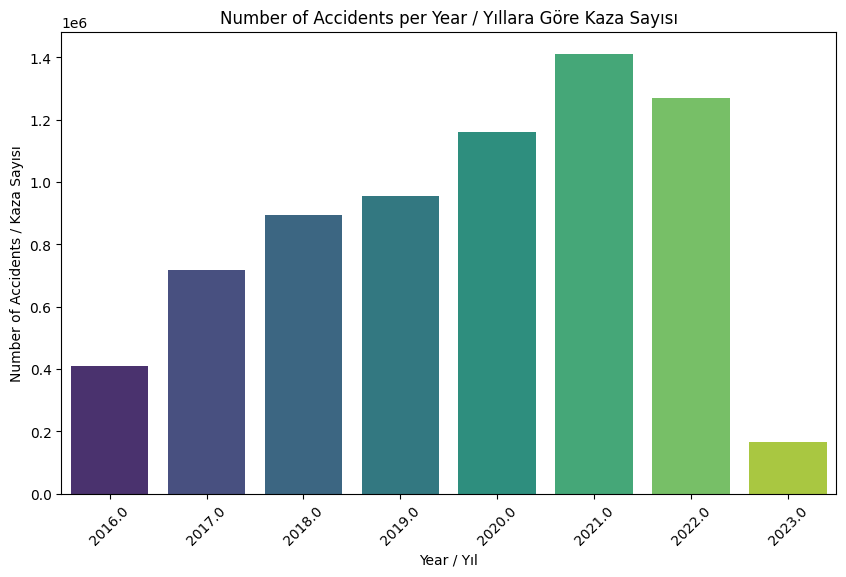

In [23]:
# Visualize the number of accidents per year
# Yıllara göre kaza sayısını görselleştirin
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis')
plt.title('Number of Accidents per Year / Yıllara Göre Kaza Sayısı')
plt.xlabel('Year / Yıl')
plt.ylabel('Number of Accidents / Kaza Sayısı')
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-88e18cf59170>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='coolwarm')


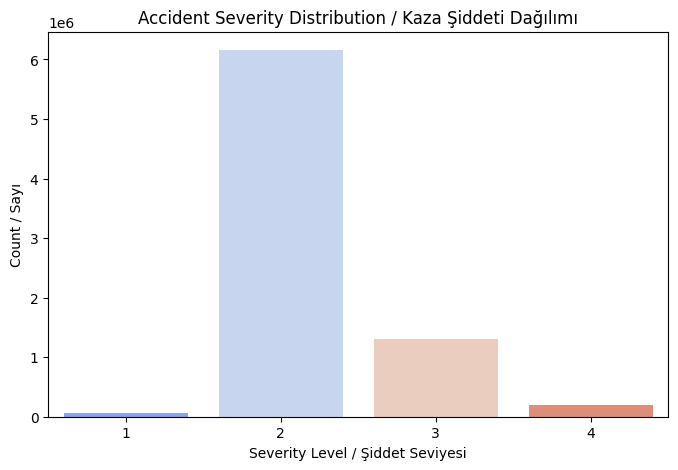

In [24]:
# Analyze accident severity distribution
# Kaza şiddeti dağılımını analiz edin
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df, palette='coolwarm')
plt.title('Accident Severity Distribution / Kaza Şiddeti Dağılımı')
plt.xlabel('Severity Level / Şiddet Seviyesi')
plt.ylabel('Count / Sayı')
plt.show()

<ipython-input-25-020889bf369a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='Spectral')


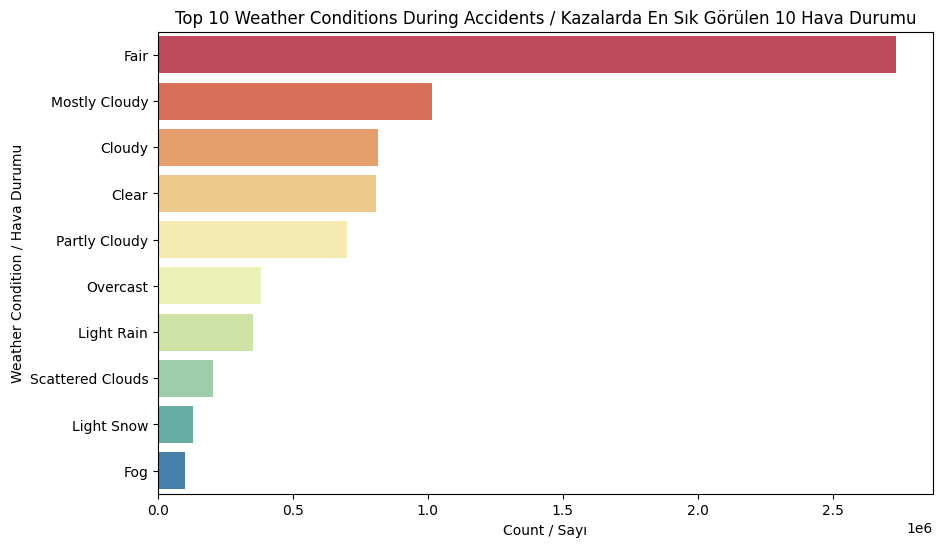

In [25]:
# Analyze accidents based on weather conditions
# Hava koşullarına göre kazaları analiz edin
weather_counts = df['Weather_Condition'].value_counts().head(10)  # Top 10 weather conditions / İlk 10 hava durumu
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='Spectral')
plt.title('Top 10 Weather Conditions During Accidents / Kazalarda En Sık Görülen 10 Hava Durumu')
plt.xlabel('Count / Sayı')
plt.ylabel('Weather Condition / Hava Durumu')
plt.show()


<ipython-input-26-e7d4e50696cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='cubehelix')


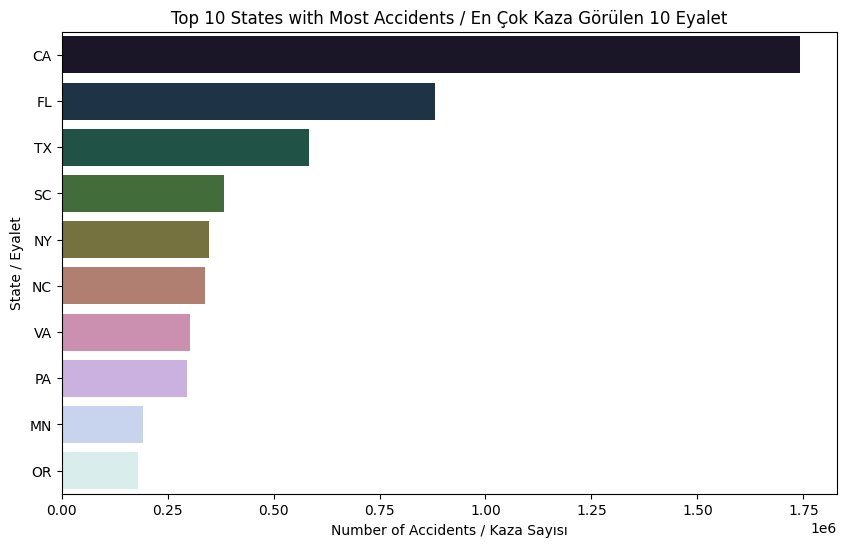

In [26]:
# Analyze accidents based on state
# Eyaletlere göre kazaları analiz edin
state_counts = df['State'].value_counts().head(10)  # Top 10 states / İlk 10 eyalet
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='cubehelix')
plt.title('Top 10 States with Most Accidents / En Çok Kaza Görülen 10 Eyalet')
plt.xlabel('Number of Accidents / Kaza Sayısı')
plt.ylabel('State / Eyalet')
plt.show()